**Nama : Muhammad Nurhaqie Windyarto**

**NIM  : 23.11.5758**

**Kelas: BDDM05/IF07**

# **Prediksi Risiko Kegagalan Atau Ketidakhadiran  Pasien dalam Menghadiri Appointment Medis Menggunakan Logistic Regression**

**Import Library & Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [ ]:
# Upload file 'noshowappointments.csv' ke Google Colab terlebih dahulu
df = pd.read_csv("noshowappointments.csv")



**Data Understanding**

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,WaitingDays
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
print("Jumlah data:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah data: 110527
Jumlah kolom: 15


**Data Cleaning & Preprocessing**

In [ ]:
df.isnull().sum()


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [ ]:
df.columns = df.columns.str.replace('-', '_')
df['No_show'] = df['No_show'].map({'Yes':1, 'No':0})

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['WaitingDays'] = df['WaitingDays'].abs()


EDA

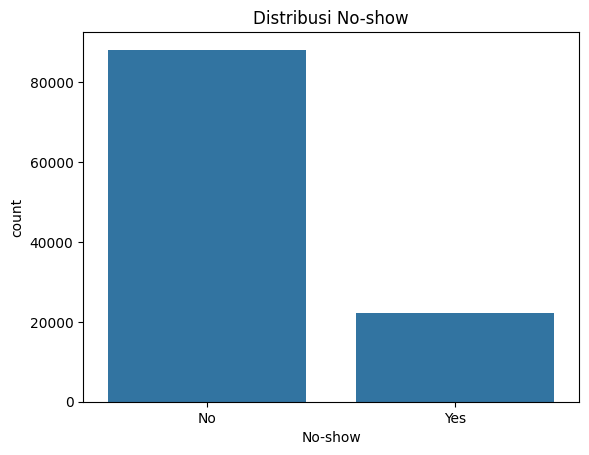

In [ ]:
sns.countplot(x=df['No-show'])
plt.title("Distribusi No-show")
plt.show()

**Encoding & Feature Selection Awal**

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

features = [
    'Gender','Age','Scholarship','Hipertension',
    'Diabetes','Alcoholism','Handcap',
    'SMS_received','WaitingDays'
]

X = df[features]
y = df['No_show']


## **Modeling**

**Scaling & Split Data**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


**Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [ ]:
import joblib
joblib.dump(model, 'Model_Prediksi_Pasien.pkl')

['Model_Prediksi_Pasien.pkl']

# **EVALUASI**

In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7965258300913779
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.33      0.01      0.03      4437

    accuracy                           0.80     22106
   macro avg       0.57      0.50      0.46     22106
weighted avg       0.71      0.80      0.71     22106



**Confusion Matrix**

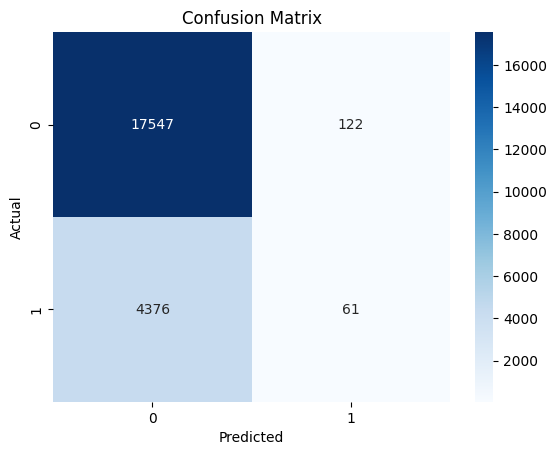

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **Hasil Analisis**
Berdasarkan hasil eksperimen yang dilakukan, model Logistic Regression
menghasilkan nilai akurasi sebesar 79,65%. Nilai ini menunjukkan bahwa model
mampu memprediksi status kehadiran pasien dengan cukup baik secara keseluruhan. Namun, analisis lebih lanjut menunjukkan bahwa model lebih akurat dalam memprediksi pasien yang hadir dibandingkan pasien yang tidak hadir. Hal ini terlihat dari masih tingginya jumlah pasien no-show yang gagal terdeteksi oleh model.

## **Pembahasan**

Hasil tersebut dipengaruhi oleh ketidakseimbangan distribusi kelas pada dataset, di mana jumlah pasien yang hadir jauh lebih banyak dibandingkan pasien yang tidak hadir. Kondisi ini menyebabkan model Logistic Regression lebih fokus mempelajari pola dari kelas mayoritas. Selain itu, sebagai model klasifikasi linear, Logistic Regression memiliki keterbatasan dalam mengenali pola yang lebih kompleks, khususnya pada kelas pasien no-show. Oleh karena itu, meskipun nilai akurasi cukup tinggi, kemampuan deteksi terhadap pasien yang tidak hadir masih rendah.

## **Kesimpulan**

Dari penelitian yang telah dilakukan, dapat disimpulkan bahwa model Logistic Regression mampu memprediksi risiko kegagalan pasien dalam menghadiri appointment medis dengan tingkat akurasi yang cukup baik. Namun demikian, model masih memiliki keterbatasan dalam mendeteksi pasien no-show secara optimal. Meskipun demikian, penelitian ini telah berhasil menerapkan seluruh tahapan data mining secara sistematis dan model yang dihasilkan dapat dijadikan sebagai dasar untuk pengembangan lebih lanjut.